In [2]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

SyntaxError: invalid syntax (3204105863.py, line 1)

SyntaxError: invalid syntax (3204105863.py, line 1)

# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [3]:
loc = '../data/'
file = 'ufc_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
6728,win,Aleksandra Albu:Kailin Curran,0:0,82:86,5:1,0:0,Women's Strawweight,U-DEC:,3,5:00,2017-07-29,Aleksandra Albu,Kailin Curran,0,0,82,86,5,1,0,0,1.00,0.20,1,0,0,2,15.000,3.0,0.0,-0,157.48,51.75,160.02,Orthodox,32.0,4.83,0.47,5.56,0.38,2.27,0.50,0.77,0.4,4.0,0.0,-0,162.56,51.75,165.10,Orthodox,31.0,3.89,0.43,4.75,0.53,2.00,0.57,0.61,0.6
6729,win,Jarred Brooks:Eric Shelton,0:0,27:31,5:1,1:1,Flyweight,S-DEC:,3,5:00,2017-07-29,Jarred Brooks,Eric Shelton,0,0,27,31,5,1,1,1,0.00,0.00,0,0,0,1,15.000,13.0,2.0,0,160.02,56.25,157.48,Switch,29.0,2.12,0.46,1.66,0.62,4.54,0.57,0.69,0.6,12.0,6.0,0,167.64,56.25,172.72,Orthodox,31.0,2.57,0.42,1.88,0.63,2.83,0.51,0.46,0.2
6730,win,Drew Dober:Joshua Burkman,1:0,15:11,0:0,0:0,Lightweight,KO/TKO:Punch,1,3:04,2017-07-29,Drew Dober,Joshua Burkman,1,0,15,11,0,0,0,0,0.43,0.38,0,0,1,3,3.067,25.0,1.0,-0,172.72,69.75,177.80,Southpaw,34.0,4.47,0.40,4.16,0.51,0.75,0.17,0.54,0.1,28.0,1.0,-0,177.80,76.50,182.88,Orthodox,42.0,2.69,0.43,3.13,0.51,2.53,0.36,0.72,0.3


In [4]:
df = df.rename(columns={'w/l':'result','fighter':'match','w_fighter':'fighter','l_fighter':'opponent'})
df['result'] = 'win'
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['match','kd','str','td','sub'])
df.head(3)

,result,weight class,method,round,time,date,fighter,opponent,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **'f_'** </span> - Fighter statistic column
* <span style='color:blue'> **'o_'** </span> - Opponent statistic column

In [5]:
# create fighter vs opponent data table

for column in df.columns:
    if column.startswith('w_') == True:
        df = df.rename(columns={column:'f_'+column[2:]})
    elif column.startswith('l_') == True:
        df = df.rename(columns={column:'o_'+column[2:]})
        
df.columns    

Index(['result', 'weight class', 'method', 'round', 'time', 'date', 'fighter',
       'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str', 'f_td', 'o_td', 'f_sub',
       'o_sub', 'f_win_perc', 'o_win_perc', 'f_win_strk', 'o_win_strk',
       'f_lose_strk', 'o_lose_strk', 'ttime', 'f_wins', 'f_losses', 'f_draws',
       'f_height', 'f_weight', 'f_reach', 'f_stance', 'f_age', 'f_slpm',
       'f_str. acc.', 'f_sapm', 'f_str. def', 'f_td avg.', 'f_td acc.',
       'f_td def.', 'f_sub. avg.', 'o_wins', 'o_losses', 'o_draws', 'o_height',
       'o_weight', 'o_reach', 'o_stance', 'o_age', 'o_slpm', 'o_str. acc.',
       'o_sapm', 'o_str. def', 'o_td avg.', 'o_td acc.', 'o_td def.',
       'o_sub. avg.'],
      dtype='object')

# <span style='color:green'> **[done]** </span>Feature Y
1. get randome rows & swap stats between fighters  
2. change result to "lose"
** this way first fighter will not always be the winner

### <span style='color:green'> **[done]** </span> Function setup:

In [6]:
original_size = len(df)

for index in tqdm(range(0,original_size)): 
    if random.random() > 0.5:
        df.loc[index] = get_swaped_row(index, data=df)
     
print(df['result'].value_counts())
df.head(3)

100%|█████████████████████████████████████████████████████████████████████████████| 6731/6731 [00:07<00:00, 862.16it/s]

win     3410
lose    3321
Name: result, dtype: int64


,result,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,1,1,29,110,0,0,0,0,0.73,0.88,5,0,0,1,14.383,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5
1,lose,Middleweight,U-DEC:,3,5:00,2022-09-03,Marvin Vettori,Robert Whittaker,0,0,33,74,0,1,0,0,0.73,0.78,1,0,0,1,15.000,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

# <span style='color:green'> **[done]** </span> Feature Engineering = past fight's statistics:

In [7]:
for column in ['kd','str','td','sub']:
    df[column + '_dif'] = df['f_' + column] - df['o_' + column]
    df = df.drop(columns=['f_' + column, 'o_' + column])
    
df.head(1)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1,14.383,15.0,4.0,0,187.96,118.8,190.5,Southpaw,29.0,4.12,0.5,4.24,0.45,0.0,0.0,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,0,-81,0,0


<AxesSubplot:xlabel='result', ylabel='sub_dif'>

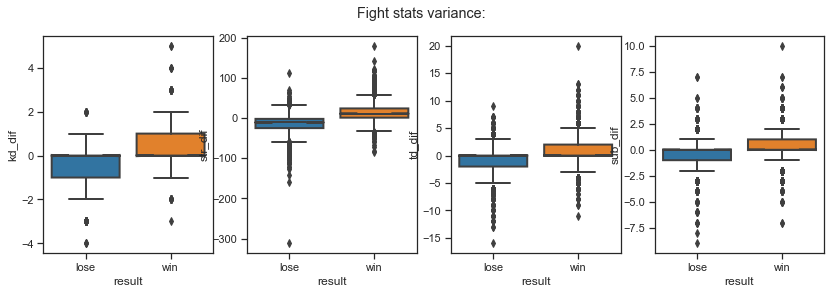

In [8]:
rows=1
cols=4
fig, axs = plt.subplots(rows,cols,figsize = (14,4))
fig.suptitle('Fight stats variance:')

sns.boxplot(ax=axs[0], x='result', y='kd_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='str_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[3], x='result', y='sub_dif', data=df,notch=True, showcaps=True)

fight stats contain significant varince > will be included as features

In [9]:
new_features = ['kd_dif','str_dif','td_dif','sub_dif']
for column in new_features:
    df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])

df[new_features].head()    

,kd_dif,str_dif,td_dif,sub_dif
0,-0.001811,-3.055863,-0.007389,0.007931
1,-0.001811,-1.550269,-0.402137,0.007931
2,-0.001811,0.181164,0.782106,1.702650
3,-1.356273,-0.759832,-0.007389,0.007931
4,-0.001811,0.444643,1.176854,-0.839429


In [10]:
features = []
new_features = ['kd_dif','str_dif','td_dif','sub_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = df[feature]

print('+ Features:')    
print(features)    

+ Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [11]:
tdf = (df[['result','fighter','opponent','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]).copy()
tdf.head(3)

,result,fighter,opponent,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,lose,Tai Tuivasa,Ciryl Gane,0.00,0.00,0.52,0.62,0.21,0.55
1,lose,Marvin Vettori,Robert Whittaker,1.89,0.44,0.74,0.82,0.37,0.84
2,win,Nassourdine Imavov,Joaquin Buckley,0.95,0.23,0.76,1.35,0.30,0.66


In [12]:
columns = ['td avg.','td acc.','td def.']
for column in columns:
    tdf[column + '_dif'] = tdf['f_' + column] - tdf['o_' + column]
    tdf[column + '_dif'] = (tdf[column + '_dif'] - np.mean(tdf[column + '_dif']))/np.std(tdf[column + '_dif'])
    
tdf = tdf[['result','td avg._dif','td acc._dif','td def._dif']]   
tdf.head()

,result,td avg._dif,td acc._dif,td def._dif
0,lose,-0.336318,-0.709985,-0.111450
1,lose,0.605889,0.269465,-0.346003
2,win,-0.213664,-0.220260,0.324149
3,lose,0.617040,0.234484,-0.144957
4,win,1.681901,2.123423,1.999530


<AxesSubplot:xlabel='result', ylabel='td avg._dif'>

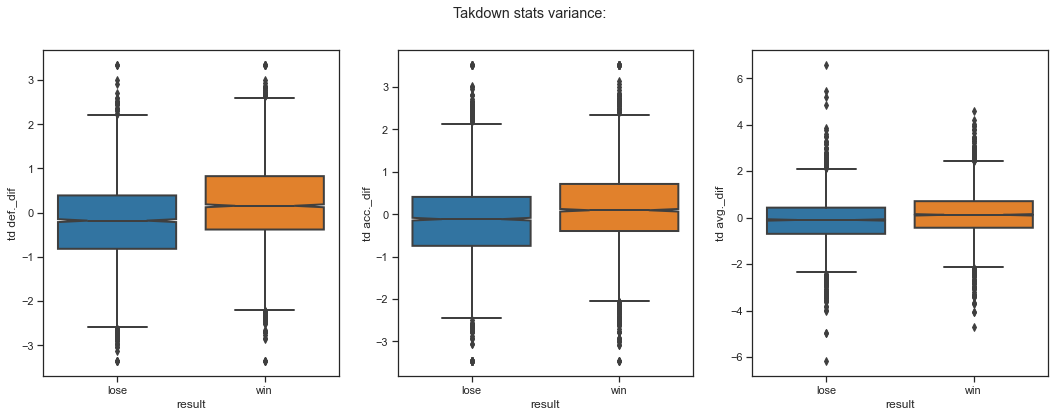

In [13]:
rows=1
cols=3
fig, axs = plt.subplots(rows,cols,figsize = (18,6))
fig.suptitle('Takdown stats variance:')

sns.boxplot(ax=axs[0], x='result', y='td def._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='td acc._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td avg._dif', data=tdf,notch=True, showcaps=True)

takedowns statistics contain variance > will be included as features

In [14]:
new_features = tdf.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('Features:')    
print(features)    

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [15]:
columns = ['result','fighter', 'opponent','f_sub. avg.','o_sub. avg.']
sub_df = (df[columns]).copy()
sub_df.head(3)

,result,fighter,opponent,f_sub. avg.,o_sub. avg.
0,lose,Tai Tuivasa,Ciryl Gane,0.0,0.5
1,lose,Marvin Vettori,Robert Whittaker,0.6,0.0
2,win,Nassourdine Imavov,Joaquin Buckley,2.4,0.0


In [16]:
column = 'sub. avg.'
sub_df[column + '_dif'] = sub_df['f_' + column] - sub_df['o_' + column]
    
sub_df = sub_df[['result', column+'_dif']]   
sub_df.head()

,result,sub. avg._dif
0,lose,-0.5
1,lose,0.6
2,win,2.4
3,lose,0.0
4,win,-1.0


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

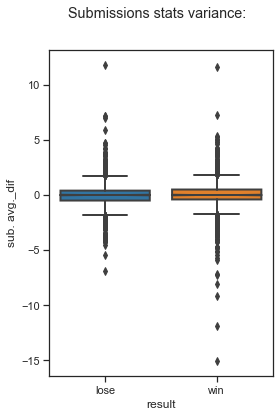

In [17]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=sub_df, notch=True, showcaps=True)

it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [18]:
mask = df['method'].str.contains('SUB:')
test_sub_df = (df.loc[mask, ['result','fighter','opponent','f_sub. avg.','o_sub. avg.']]).copy()
test_sub_df['sub. avg._dif'] = test_sub_df['f_sub. avg.'] - test_sub_df['o_sub. avg.']
test_sub_df.head()

,result,fighter,opponent,f_sub. avg.,o_sub. avg.,sub. avg._dif
11,win,Stephanie Egger,Ailin Perez,0.8,0.0,0.8
28,win,Frank Mir,Pete Williams,2.0,0.9,1.1
29,lose,Kelly Dullanty,Matt Serra,0.0,0.9,-0.9
32,lose,Chris Camozzi,Jacare Souza,0.5,1.3,-0.8
36,win,Francisco Trinaldo,Mike Rio,0.5,1.0,-0.5


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

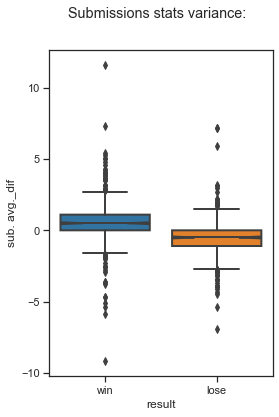

In [19]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=test_sub_df, notch=True, showcaps=True)

after filtering only the fights that ended with submissions we see significant impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [20]:
column = 'sub. avg._dif'
sub_df[column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
sub_df = sub_df[[column]] 

In [21]:
feature = 'sub. avg._dif'
features.append(feature)
df[feature] = sub_df[feature]
    
print(features)   

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [22]:
str_df = (df[['result','fighter','opponent','method','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def','str_dif']]).copy()
str_df.head()

,result,fighter,opponent,method,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,str_dif
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,4.12,5.11,0.50,0.59,4.24,2.25,0.45,0.62,-3.055863
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,4.20,4.48,0.44,0.42,3.58,3.26,0.59,0.61,-1.550269
2,win,Nassourdine Imavov,Joaquin Buckley,U-DEC:,4.08,3.61,0.54,0.32,2.43,3.42,0.62,0.54,0.181164
3,lose,Alessio Di Chirico,Roman Kopylov,KO/TKO:Punches,3.32,3.44,0.39,0.44,3.44,3.81,0.61,0.60,-0.759832
4,win,William Gomis,Jarno Errens,U-DEC:,2.13,1.33,0.45,0.37,1.33,2.13,0.62,0.54,0.444643


In [23]:
columns = ['slpm','str. acc.','sapm','str. def']
for column in columns:
    str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
    str_df[column + '_dif'] = (str_df[column + '_dif'] - np.mean(str_df[column + '_dif']))/np.std(str_df[column + '_dif'])
    
str_df = str_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif', columns[3] +'_dif']]   
str_df.head()

,result,slpm_dif,str. acc._dif,sapm_dif,str. def_dif
0,lose,-0.644789,-0.735361,1.195881,-1.425102
1,lose,-0.195592,0.156509,0.176162,-0.163536
2,win,0.278911,1.778090,-0.623738,0.677508
3,lose,-0.094365,-0.411045,-0.245160,0.088778
4,win,0.487693,0.642983,-0.507722,0.677508


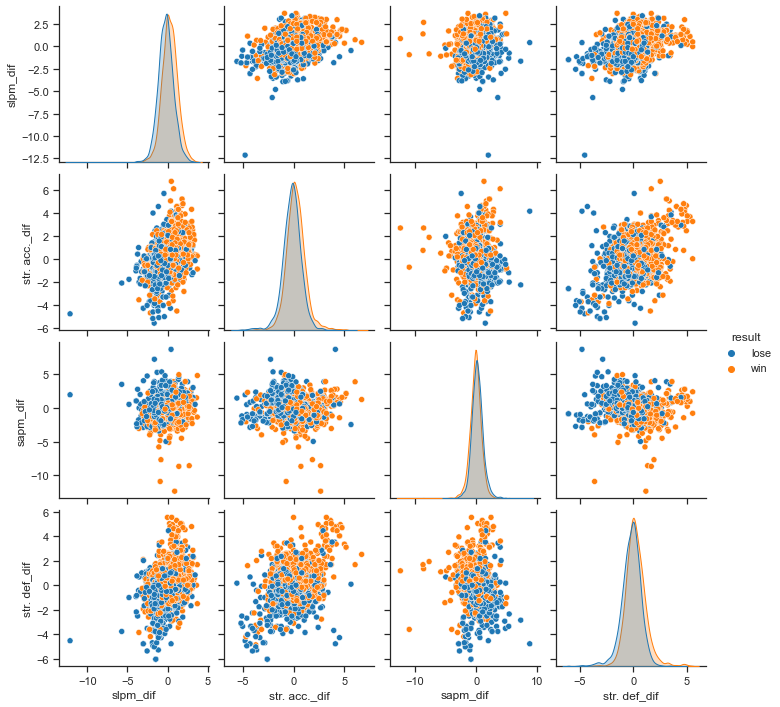

In [24]:
sns.pairplot(data=str_df, hue="result")

striking differences causing variance between fighters win & lose > will be included as features

In [25]:
new_features = str_df.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]

print('Features:')    
print(features)  

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [26]:
hdf = (df[['result','fighter','opponent','method','weight class','f_height','o_height']]).copy()
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

,result,fighter,opponent,method,weight class,f_height,o_height,height_df
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,Heavyweight,187.96,193.04,-0.775243
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,Middleweight,182.88,182.88,-0.000610
2,win,Nassourdine Imavov,Joaquin Buckley,U-DEC:,Middleweight,190.50,177.80,1.935973


<AxesSubplot:xlabel='result', ylabel='height_df'>

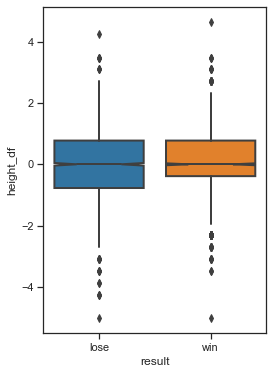

In [27]:
plt.figure(figsize = (4,6))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [28]:
rdf = (df[['result','fighter','opponent','method','weight class','f_reach','o_reach']]).copy()
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

,result,fighter,opponent,method,weight class,f_reach,o_reach,reach_dif
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,Heavyweight,190.50,205.74,-1.865456
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,Middleweight,187.96,185.42,0.283213
2,win,Nassourdine Imavov,Joaquin Buckley,U-DEC:,Middleweight,190.50,193.04,-0.330692


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

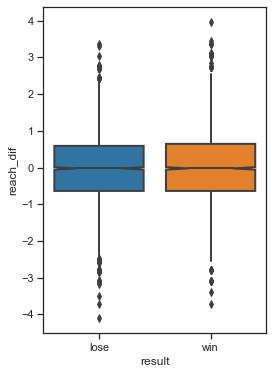

In [29]:
plt.figure(figsize = (4,6))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [30]:
stance_df = (df[['result','fighter','opponent','f_stance','o_stance']]).copy()
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

,result,fighter,opponent,f_stance,o_stance,stance_combo
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox
2,win,Nassourdine Imavov,Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw


In [31]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo=combo,data=stance_df)
    
stance_df.head(3)    

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox,0.538462
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox,0.538462
2,win,Nassourdine Imavov,Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,0.462387


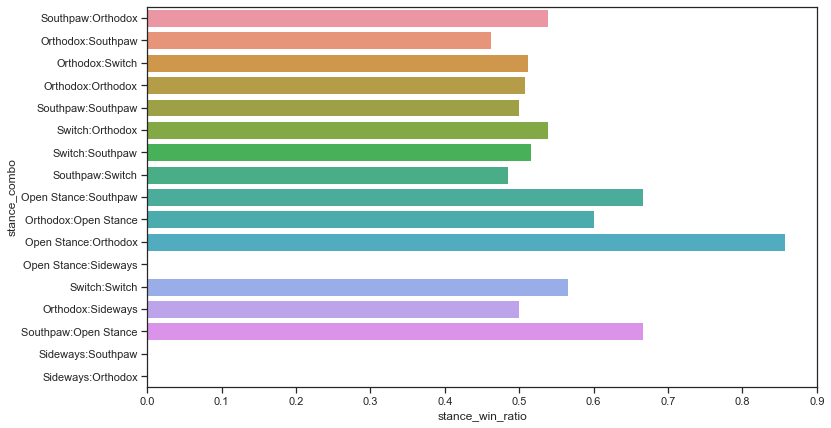

In [32]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [33]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox,1.237665
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox,1.237665
2,win,Nassourdine Imavov,Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,-1.74633


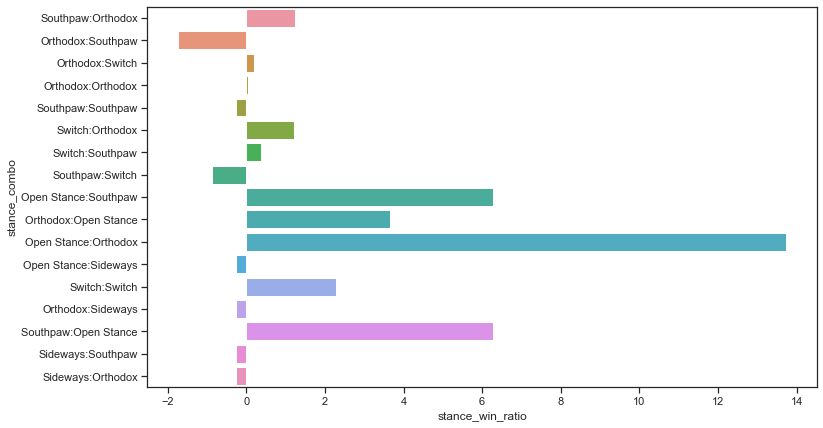

In [34]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

In [35]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio']


# <span style='color:orange'> **[in-progress]** </span> Feature layoff_time:

In [97]:
t = df[(df.fighter=='Ciryl Gane')|(df.opponent=='Ciryl Gane')].sort_values(by='date',ascending=False).reset_index(drop=True)
t

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,f_layoff_time,o_layoff_time
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1,14.383,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-0.001811,-3.055863,-0.007389,0.007931,-0.336318,-0.709985,-0.111450,-0.464166,-0.644789,-0.735361,1.195881,-1.425102,1.237665,140,231
1,win,Heavyweight,U-DEC:,5,5:00,2022-01-22,Francis Ngannou,Ciryl Gane,0.85,1.00,5,7,0,0,25.000,17.0,3.0,0,193.04,112.50,210.82,Orthodox,36.0,2.33,0.41,2.16,0.41,0.76,0.62,0.71,0.3,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-0.001811,-0.759832,1.176854,-2.534148,0.087397,1.458796,0.525195,-0.178128,-1.777272,-1.465073,-0.074189,-1.761519,0.036648,140,231
2,win,Heavyweight,KO/TKO:Punches,3,4:11,2021-08-07,Ciryl Gane,Derrick Lewis,1.00,0.76,6,4,0,0,14.183,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,26.0,1.0,-0,190.50,117.00,200.66,Orthodox,37.0,2.57,0.50,2.57,0.41,0.60,0.28,0.55,0.0,-0.001811,3.079433,-0.007389,0.007931,0.020494,-0.220260,-0.010927,0.489295,1.588542,0.724062,-0.214629,1.770865,0.036648,140,231
3,lose,Heavyweight,U-DEC:,5,5:00,2021-06-26,Alexander Volkov,Ciryl Gane,0.78,1.00,2,5,0,0,25.000,35.0,1.0,-0,200.66,112.50,203.20,Orthodox,34.0,4.88,0.57,3.04,0.53,0.51,0.70,0.71,0.1,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-0.001811,-0.759832,-0.007389,0.007931,-0.051983,1.738639,0.525195,-0.368820,-0.163959,-0.167808,0.463149,-0.752266,0.036648,140,231
4,win,Heavyweight,U-DEC:,5,5:00,2021-02-27,Ciryl Gane,Jairzinho Rozenstruik,1.00,0.83,4,1,0,0,25.000,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,12.0,4.0,0,187.96,108.90,198.12,Orthodox,34.0,2.80,0.45,3.24,0.45,0.00,0.00,0.75,0.0,-0.001811,2.251356,0.782106,0.007931,0.355006,0.759189,-0.681079,0.489295,1.443027,1.129458,-0.623738,1.434448,0.036648,140,231
5,lose,Heavyweight,KO/TKO:Elbow,2,2:34,2020-12-12,Junior Dos Santos,Ciryl Gane,0.68,1.00,0,3,3,0,7.567,21.0,9.0,0,193.04,107.10,195.58,Orthodox,38.0,4.49,0.47,3.33,0.56,0.30,0.50,0.81,0.1,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-1.356273,-1.851387,-0.007389,0.007931,-0.169062,1.039032,0.860271,-0.368820,-0.410701,-0.978598,0.640226,-0.499953,0.036648,140,231
6,win,Heavyweight,U-DEC:,3,5:00,2019-12-21,Ciryl Gane,Tanner Boser,1.00,1.00,2,1,0,0,15.000,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,20.0,9.0,1,187.96,114.75,190.50,Orthodox,31.0,4.21,0.52,2.20,0.62,0.00,0.00,0.64,0.0,-0.001811,1.235080,-0.007389,0.007931,0.355006,0.759189,-0.312495,0.489295,0.550960,0.561904,0.011297,0.004673,0.036648,140,231
7,win,Heavyweight,SUB:Heel Hook,3,4:46,2019-10-26,Ciryl Gane,Don'Tale Mayes,1.00,0.00,1,0,0,0,14.767,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,9.0,0.0,-0,198.12,117.00,205.74,Orthodox,30.0,3.65,0.45,3.84,0.43,1.11,0.53,0.57,0.0,1.352650,2.326636,1.176854,0.855291,-0.263840,-1.094769,-0.077942,0.489295,0.905256,1.129458,-0.990104,1.602657,0.036648,140,231
8,lose,Heavyweight,SUB:Arm Triangle,1,4:12,2019-08-10,Raphael Pessoa,Ciryl Gane,0.00,0.00,0,0,0,0,4.200,10.0,2.0,0,190.50,117.90,198.12,Orthodox,33.0,2.16,0.26,3.43,0.42,0.00,0.00,1.00,0.0,11.0,1.0,0,193.04

In [101]:
t['f_layoff_time'] = None
t['o_layoff_time'] = None

for index in tqdm(range(0,len(t))):
    t['f_layoff_time'] = get_layoff_time(fighter=t.loc[index,'fighter'], current_date=t.loc[index,'date'], data=t)    
    t['o_layoff_time'] = get_layoff_time(fighter=t.loc[index,'opponent'], current_date=t.loc[index,'date'], data=t)

t.tail(3)    

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 392.61it/s]


,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,f_layoff_time,o_layoff_time
6,win,Heavyweight,U-DEC:,3,5:00,2019-12-21,Ciryl Gane,Tanner Boser,1.0,1.0,2,1,0,0,15.000,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,20.0,9.0,1,187.96,114.75,190.50,Orthodox,31.0,4.21,0.52,2.20,0.62,0.00,0.00,0.64,0.0,-0.001811,1.235080,-0.007389,0.007931,0.355006,0.759189,-0.312495,0.489295,0.550960,0.561904,0.011297,0.004673,0.036648,0,0
7,win,Heavyweight,SUB:Heel Hook,3,4:46,2019-10-26,Ciryl Gane,Don'Tale Mayes,1.0,0.0,1,0,0,0,14.767,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,9.0,0.0,-0,198.12,117.00,205.74,Orthodox,30.0,3.65,0.45,3.84,0.43,1.11,0.53,0.57,0.0,1.352650,2.326636,1.176854,0.855291,-0.263840,-1.094769,-0.077942,0.489295,0.905256,1.129458,-0.990104,1.602657,0.036648,0,0
8,lose,Heavyweight,SUB:Arm Triangle,1,4:12,2019-08-10,Raphael Pessoa,Ciryl Gane,0.0,0.0,0,0,0,0,4.200,10.0,2.0,0,190.50,117.90,198.12,Orthodox,33.0,2.16,0.26,3.43,0.42,0.00,0.00,1.00,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-0.001811,-0.308154,-0.007389,-0.839429,-0.336318,-0.709985,1.496915,-0.464166,-1.884826,-2.681259,0.701287,-1.677415,0.036648,0,0


In [92]:
df

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,f_layoff_time,o_layoff_time
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1,14.383,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-0.001811,-3.055863,-0.007389,0.007931,-0.336318,-0.709985,-0.111450,-0.464166,-0.644789,-0.735361,1.195881,-1.425102,1.237665,140,231
1,lose,Middleweight,U-DEC:,3,5:00,2022-09-03,Marvin Vettori,Robert Whittaker,0.73,0.78,1,0,0,1,15.000,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,-0.001811,-1.550269,-0.402137,0.007931,0.605889,0.269465,-0.346003,0.584641,-0.195592,0.156509,0.176162,-0.163536,1.237665,140,231
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0.75,0.71,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0,-0.001811,0.181164,0.782106,1.702650,-0.213664,-0.220260,0.324149,2.300872,0.278911,1.778090,-0.623738,0.677508,-1.74633,140,231
3,lose,Middleweight,KO/TKO:Punches,3,1:09,2022-09-03,Alessio Di Chirico,Roman Kopylov,0.40,0.00,0,0,1,2,11.150,13.0,7.0,0,182.88,83.25,187.96,Orthodox,33.0,3.32,0.39,3.44,0.61,1.46,0.39,0.83,0.0,9.0,0.0,-0,182.88,83.25,190.50,Southpaw,31.0,3.44,0.44,3.81,0.60,0.37,0.33,0.87,0.0,-1.356273,-0.759832,-0.007389,0.007931,0.617040,0.234484,-0.144957,0.012565,-0.094365,-0.411045,-0.245160,0.088778,-1.74633,140,231
4,win,Featherweight,U-DEC:,3,5:00,2022-09-03,William Gomis,Jarno Errens,0.00,0.00,0,0,0,0,15.000,11.0,2.0,0,182.88,65.25,185.42,Southpaw,25.0,2.13,0.45,1.33,0.62,3.00,0.60,1.00,0.0,13.0,4.0,1,180.34,65.25,185.42,Orthodox,28.0,1.33,0.37,2.13,0.54,0.00,0.00,0.40,1.0,-0.001811,0.444643,1.176854,-0.839429,1.681901,2.123423,1.999530,-0.940897,0.487693,0.642983,-0.507722,0.677508,1.237665,140,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6726,lose,Featherweight,SUB:Guillotine Choke,3,2:59,2017-07-29,Renato Moicano,Brian Ortega,1.00,1.00,3,3,0,0,12.983,16.0,5.0,1,180.34,69.75,182.88,Orthodox,33.0,4.80,0.48,4.07,0.61,1.70,0.48,0.73,0.6,15.0,3.0,0,172.72,65.25,175.26,Switch,31.0,4.19,0.38,6.66,0.49,0.95,0.23,0.56,1.2,-0.001811,1.649119,0.782106,-0.839429,0.427483,0.899111,0.558702,-0.559512,0.367485,0.805141,-1.600715,1.013926,0.198218,140,231
6727,lose,Featherweight,U-DEC:,3,5:00,2017-07-29,Andre Fili,Calvin Kattar,0.57,0.00,1,0,0,0,15.000,22.0,9.0,0,180.34,65.25,187.96,Orthodox,32.0,3.83,0.37,4.03,0.52,2.38,0.49,0.69,0.3,23.0,7.0,0,180.34,65.25,182.88,Orthodox,34.0,5.12,0.39,7.10,0.54,0.42,0.29,0.91,0.1,-0.001811,-0.082314,-0.796885,0.007931,1.102081,0.724209,-0.748094,0.203257,-0.834591,-0.167808,-1.893808,-0.163536,0.036648,140,231
6728,win,Women's Strawweight,U-DEC:,3,5:00,2017-07-29,Aleksandra Albu,Kailin Curran,1.00,0.20,1,0,0,2,15.000,3.0,0.0,-0,157.48,51.75,160.02,Orthodox,32.0,4.83,0.47,5.56,0.38,2.27,0.50,0.77,0.4,4.0,0.0,-0,162.56,51.75,165.10,Orthodox,31.0,3.89,0.43,4.75,0.53,2.00,0.57,0.61,0.6,-0.001811,-0.157594,1.571602,0.007931,0.159874,-0.22026

In [87]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)
    get_layoff_time(fighter, current_date, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_colu

SyntaxError: invalid syntax (3204105863.py, line 1)

SyntaxError: invalid syntax (3204105863.py, line 1)

# <span style='color:green'> **[done]** </span> Feature Engineering = Win/Lose streak:

In [ ]:
win_df = (df[['result','fighter','opponent','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]).copy()
win_df.head(3)

In [ ]:
columns = ['win_perc','win_strk','lose_strk']

for column in columns:
    win_df[column + '_dif'] = win_df['f_' + column] - win_df['o_' + column]
    win_df[column + '_dif'] = (win_df[column + '_dif'] - np.mean(win_df[column + '_dif']))/np.std(win_df[column + '_dif'])
    
win_df = win_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif']]   
win_df.head()

In [ ]:
sns.pairplot(data=win_df, hue="result")

we can see very significant variance > might be the strongest predictor for fight's winner > will be included as features

In [ ]:
new_features = win_df.columns[1:]
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

# <span style='color:green'> **[done]** </span> saving Features data file:

In [ ]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]
final_df = final_df.dropna()
final_df.head(3)

In [ ]:
final_df.to_csv('../data/ufc_data_features.csv')